In [33]:
import pandas as pd

# Load the data
df = pd.read_csv(r'data sets\2019Floor2.csv')

pd.set_option('display.max_columns', None)
print(df.describe())



          z1_AC1(kW)   z1_Light(kW)    z1_Plug(kW)    z1_S1(degC)  \
count  495832.000000  524967.000000  524964.000000  413992.000000   
mean        8.597785       2.567044       1.116926      24.364055   
std        14.030014       3.445799       1.284228       2.768803   
min         0.000000       0.000000       0.000000      17.560000   
25%         0.000000       0.010000       0.250000      21.310000   
50%         0.000000       0.010000       0.360000      25.100000   
75%        20.110000       6.820000       2.290000      26.350000   
max        54.510000      22.380000       9.820000      31.900000   

          z1_S1(RH%)     z1_S1(lux)     z2_AC1(kW)     z2_AC2(kW)  \
count  413992.000000  413992.000000  495710.000000  523441.000000   
mean       62.706308      27.447463       6.703165       0.611393   
std         4.945365      35.049539      10.648460       0.526641   
min        45.500000       0.000000       0.000000       0.000000   
25%        59.450000       0.0000

In [34]:
# Check for missing values
print(df.isnull().sum())

# Check time format
print(df.columns[0])  # usually the timestamp column
print(df[df.columns[0]].head())

# Convert timestamp if needed
df['Timestamp'] = pd.to_datetime(df[df.columns[0]])
df.set_index('Timestamp', inplace=True)


Date                 0
z1_AC1(kW)       29768
z1_Light(kW)       633
z1_Plug(kW)        636
z1_S1(degC)     111608
z1_S1(RH%)      111608
z1_S1(lux)      111608
z2_AC1(kW)       29890
z2_AC2(kW)        2159
z2_AC3(kW)        2159
z2_AC4(kW)        2159
z2_AC5(kW)         651
z2_AC6(kW)         651
z2_AC7(kW)         651
z2_AC8(kW)         651
z2_AC9(kW)         651
z2_AC10(kW)        651
z2_AC11(kW)        651
z2_AC12(kW)        651
z2_AC13(kW)        651
z2_AC14(kW)        651
z2_Light(kW)       736
z2_Plug(kW)        783
z2_S1(degC)      97021
z2_S1(RH%)       97018
z2_S1(lux)       97020
z3_Light(kW)       634
z3_Plug(kW)        633
z3_S1(degC)     102411
z3_S1(RH%)      102410
z3_S1(lux)      102414
z4_AC1(kW)       29772
z4_Light(kW)      2159
z4_Plug(kW)        783
z4_S1(degC)     103285
z4_S1(RH%)      103283
z4_S1(lux)      103288
dtype: int64
Date
0    2019-01-01 00:00:00
1    2019-01-01 00:01:00
2    2019-01-01 00:02:00
3    2019-01-01 00:03:00
4    2019-01-01 00:04:00
Name: 

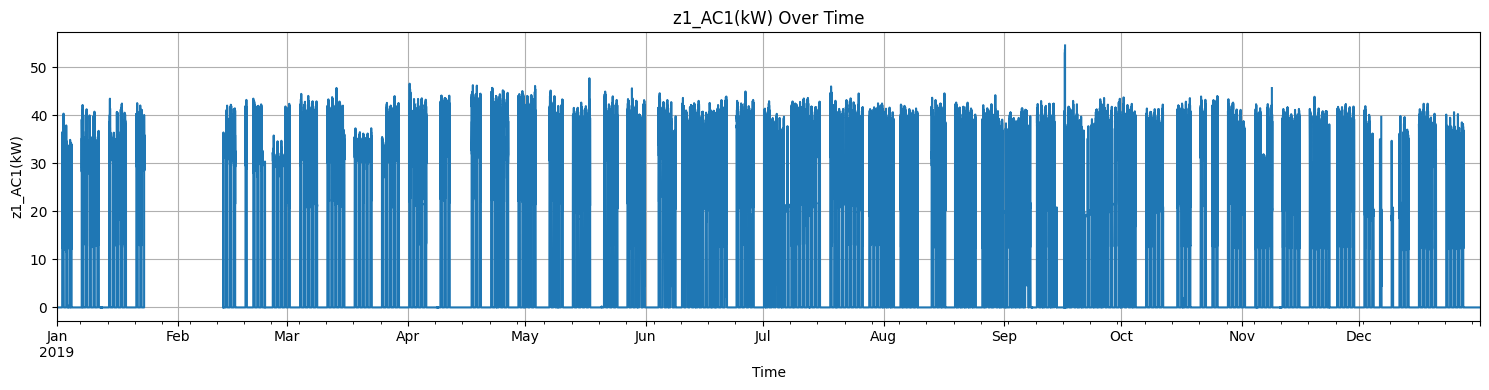

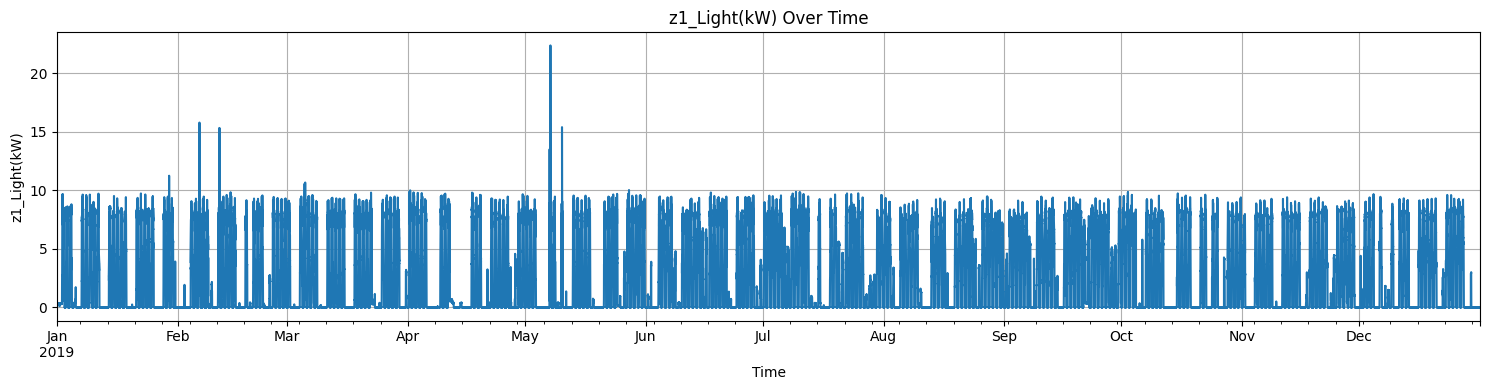

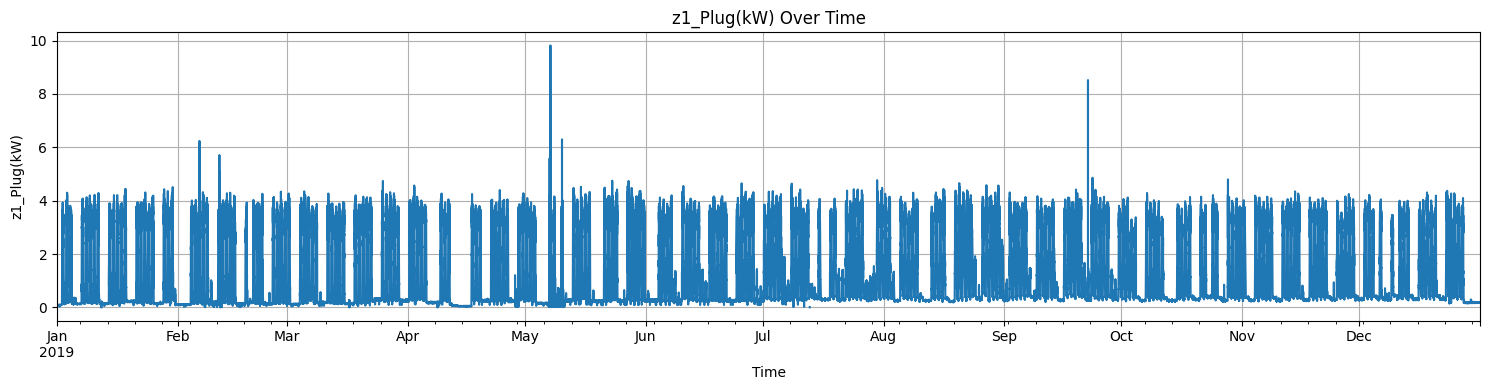

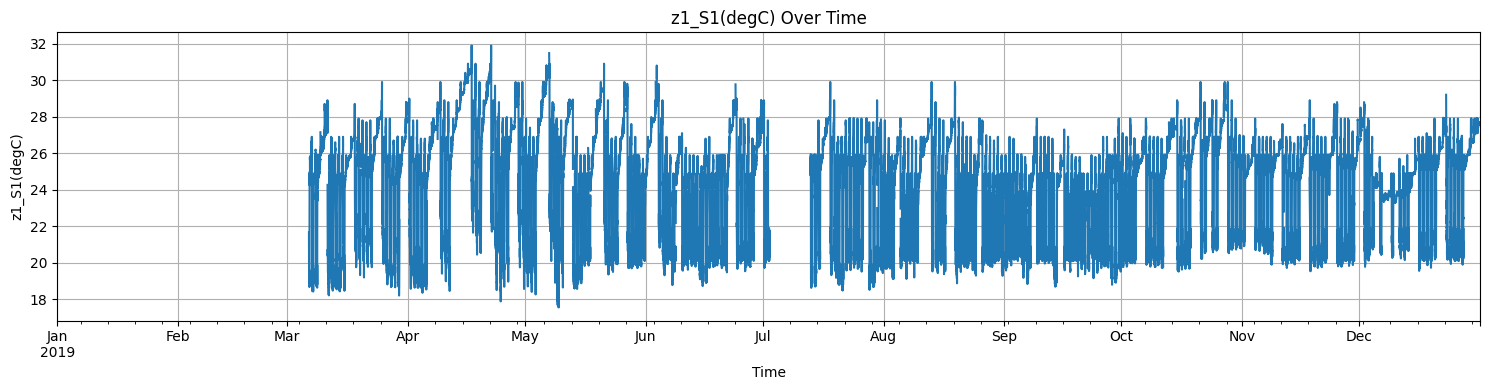

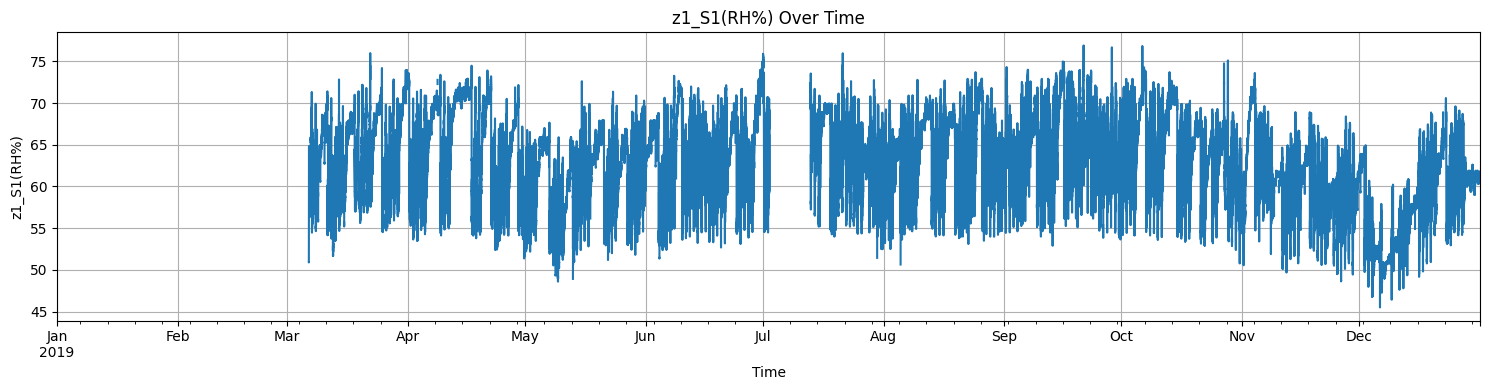

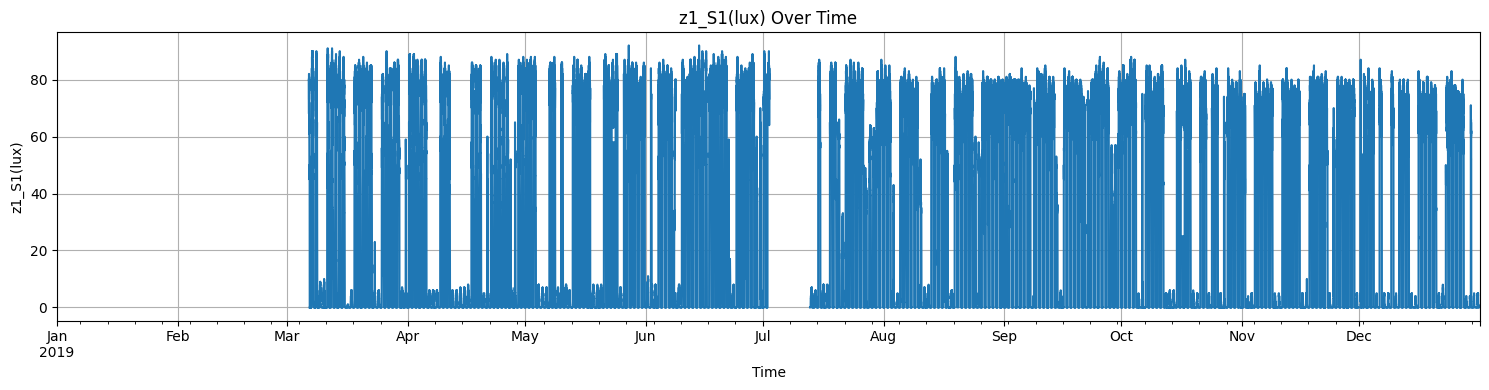

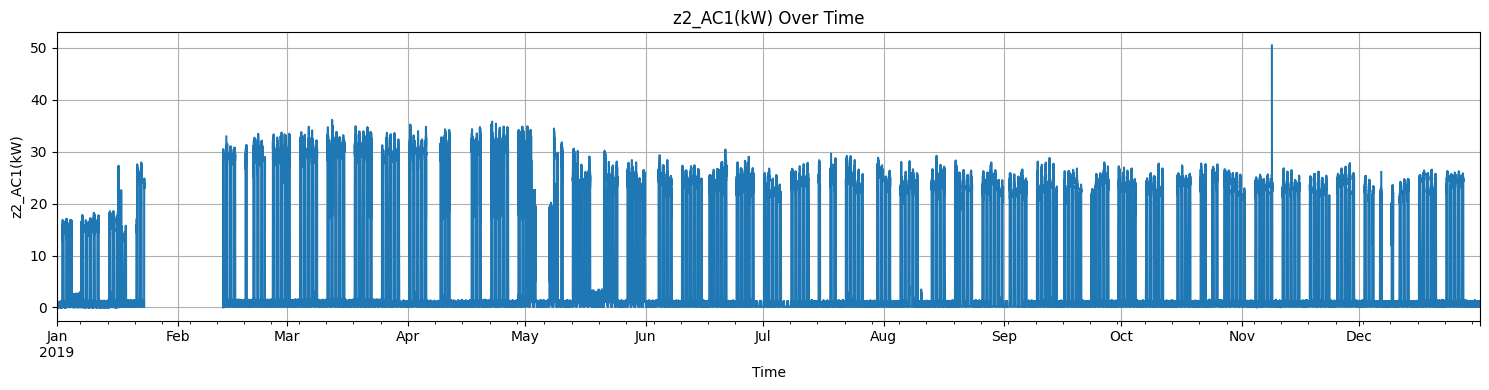

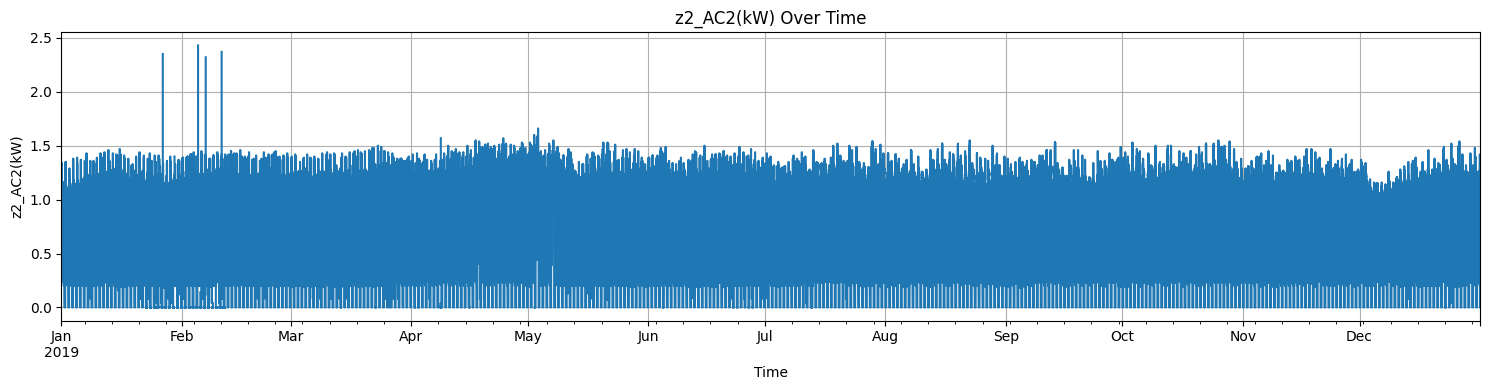

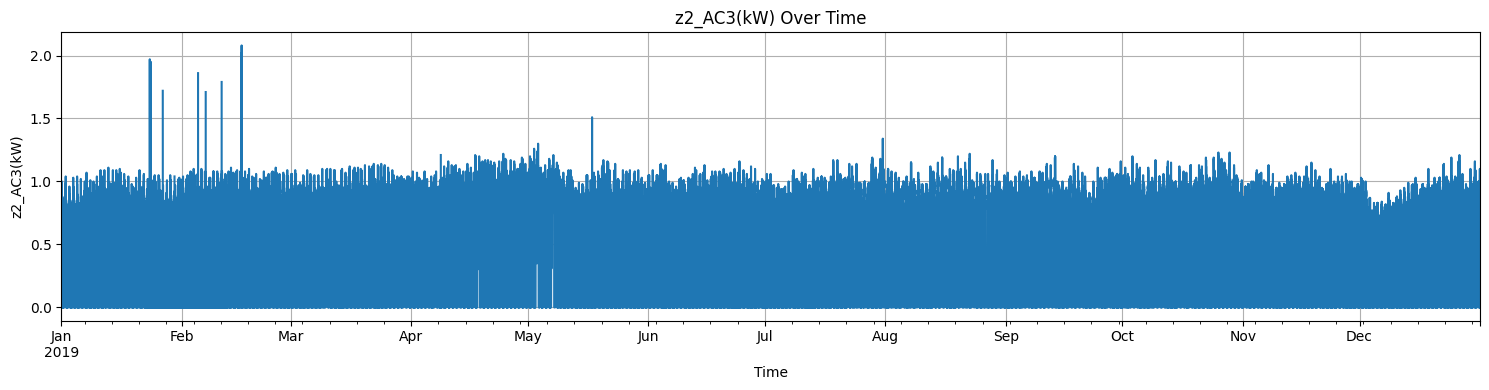

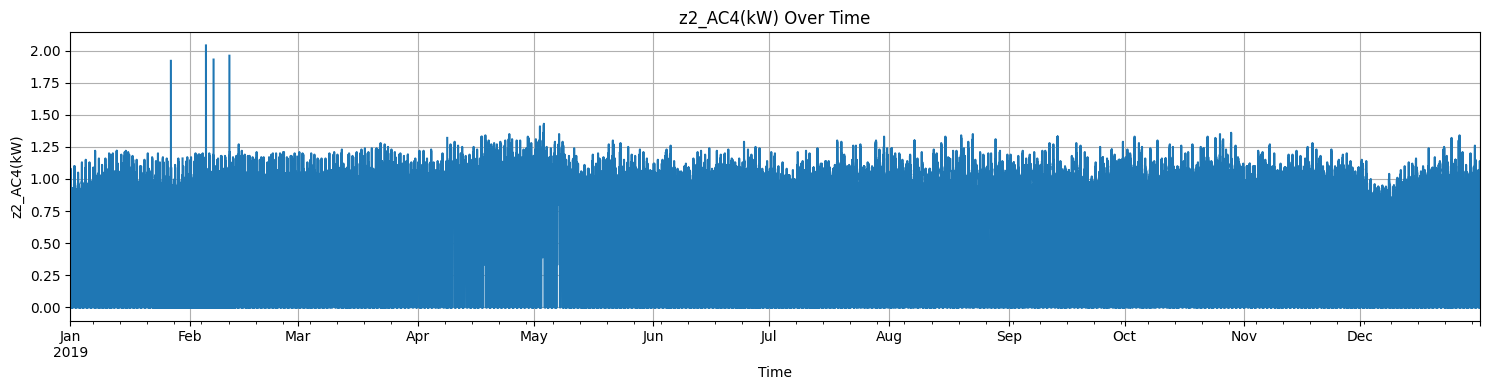

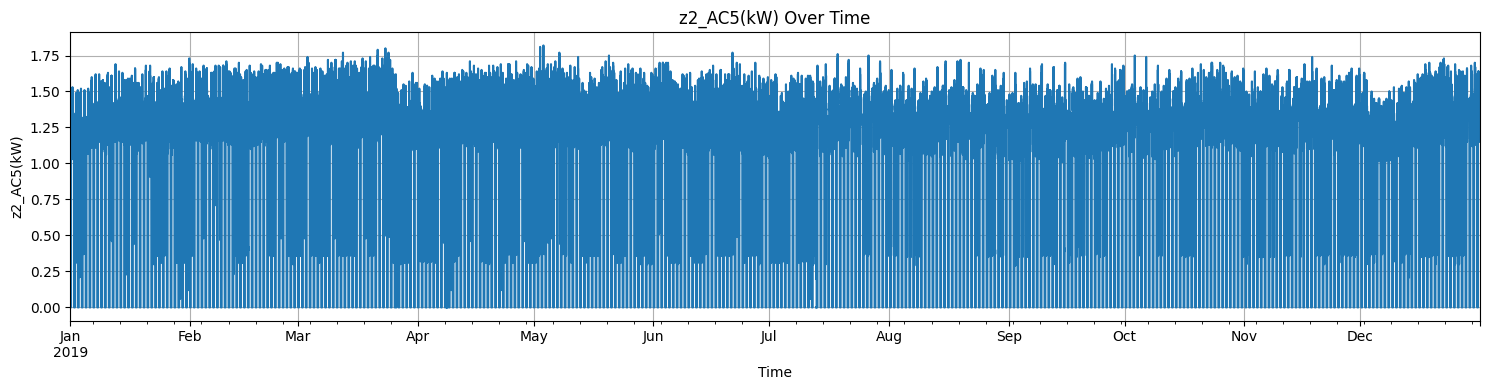

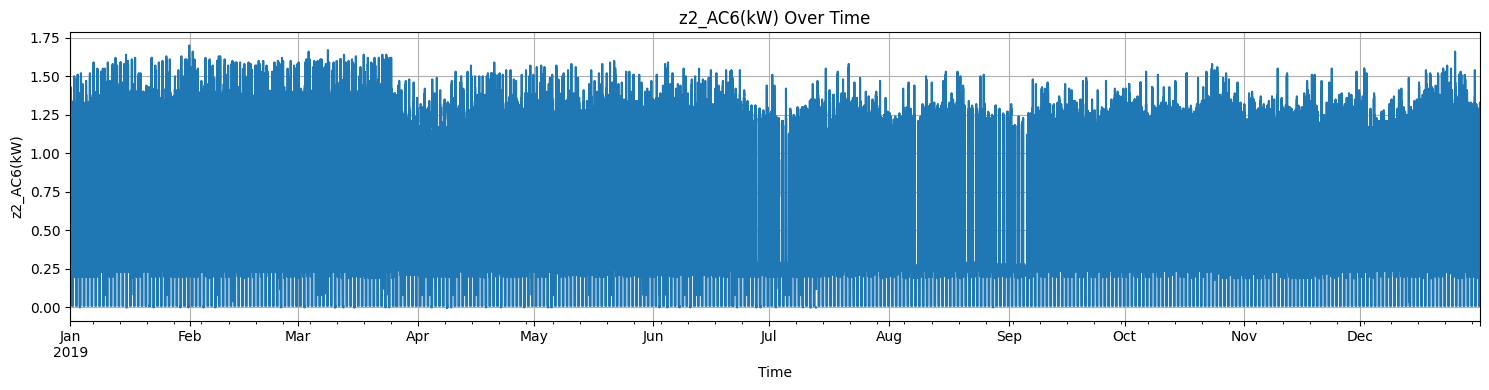

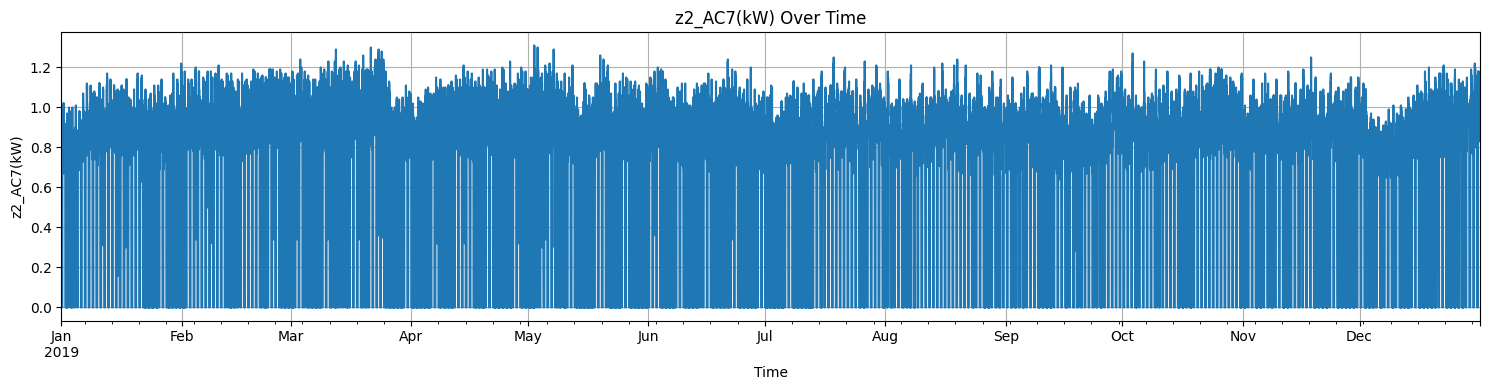

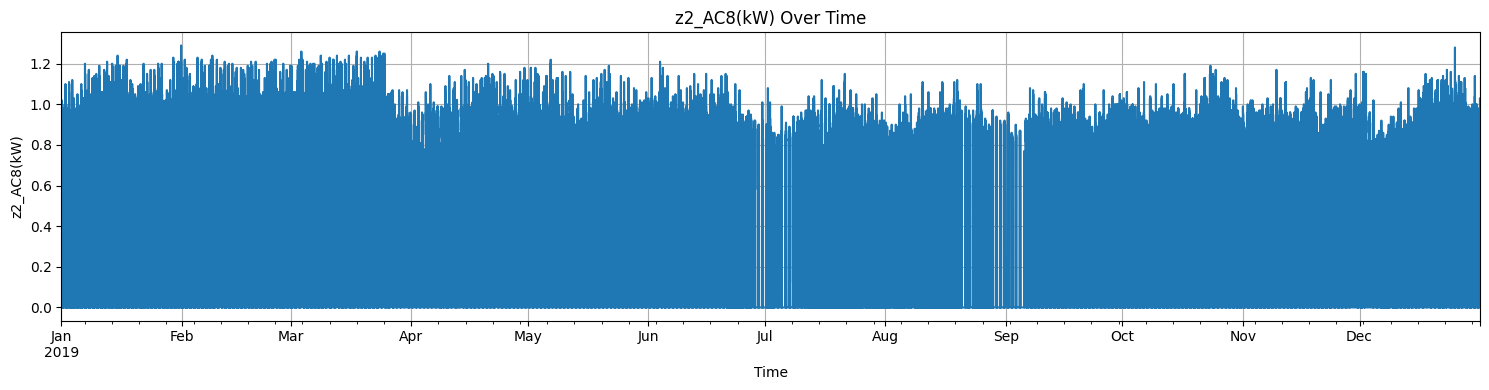

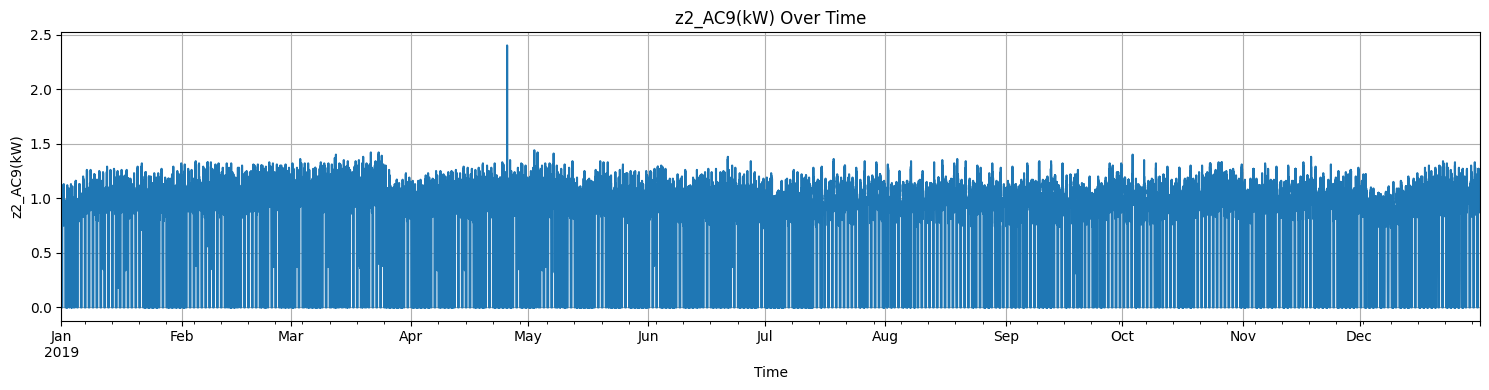

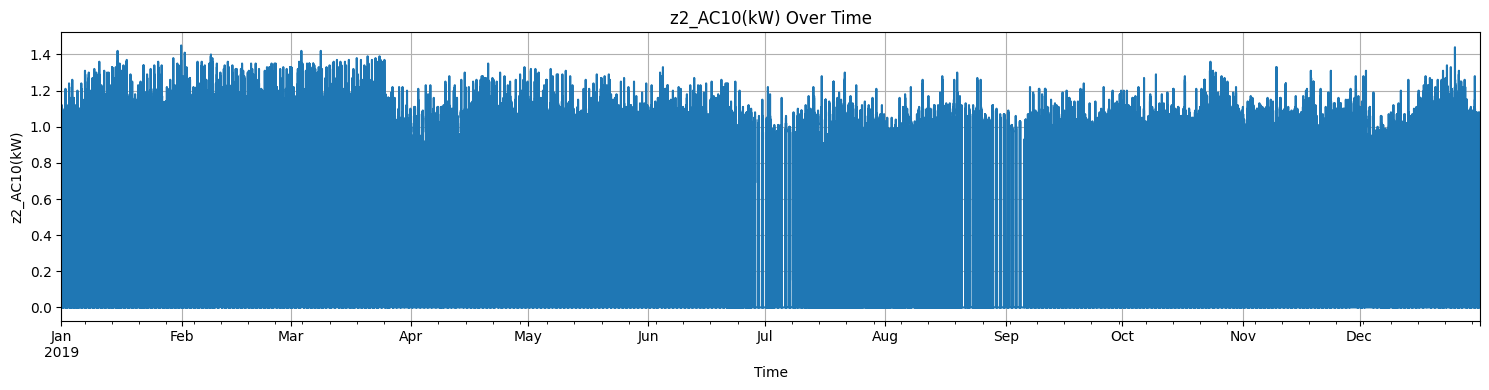

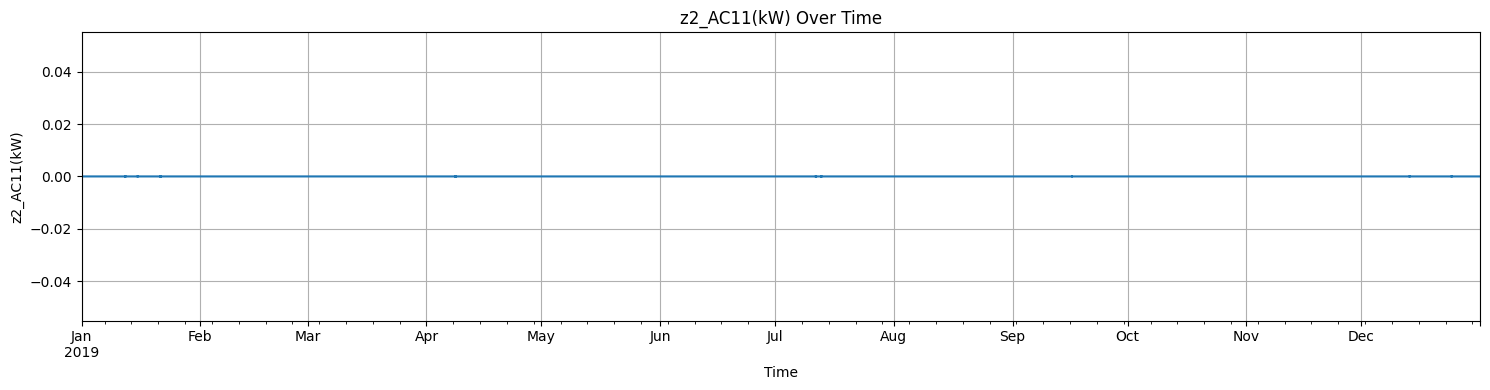

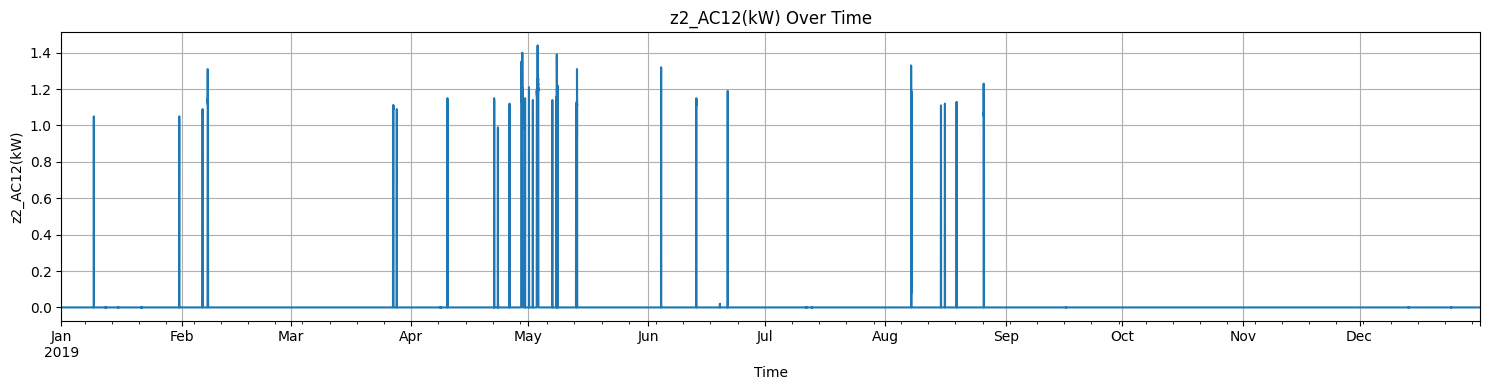

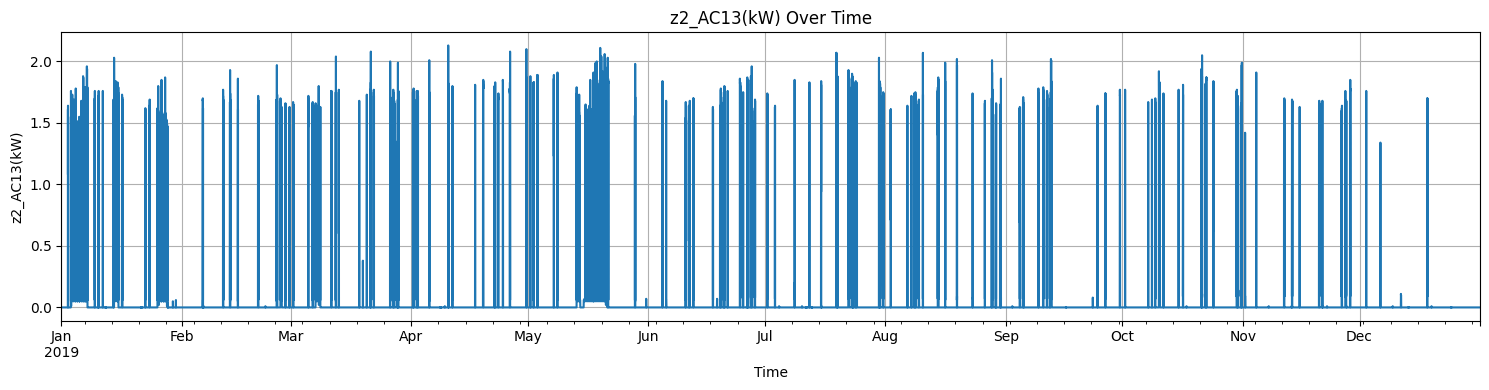

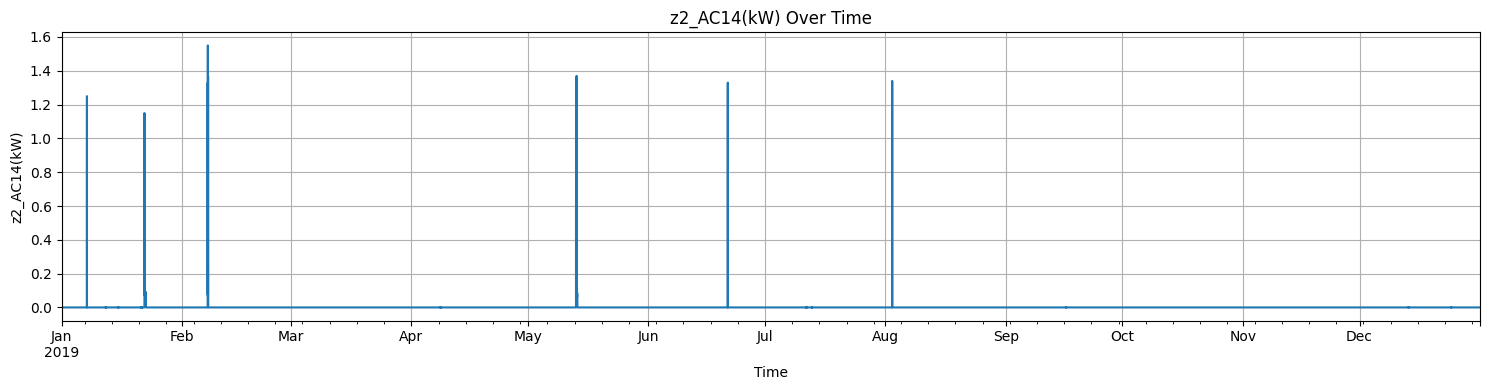

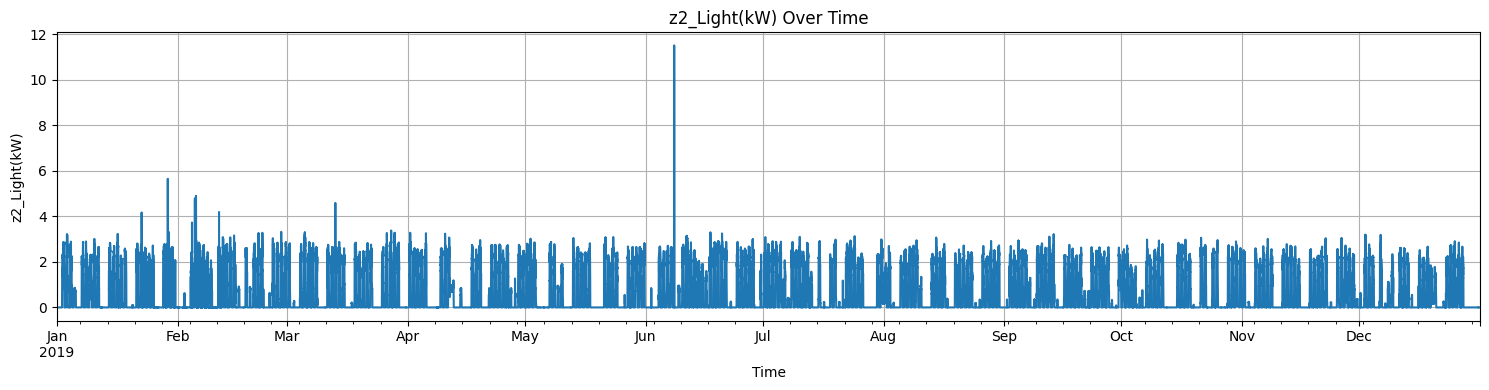

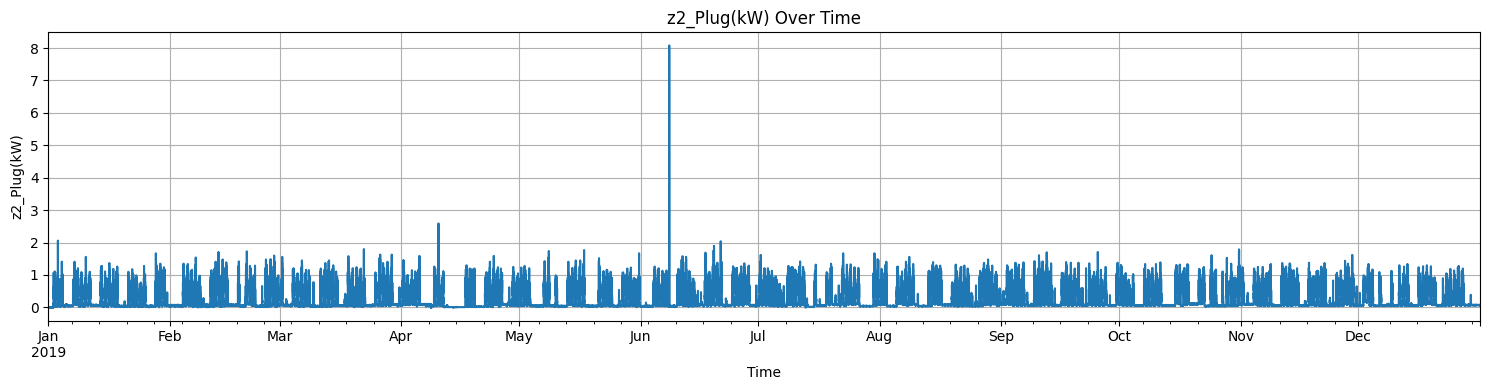

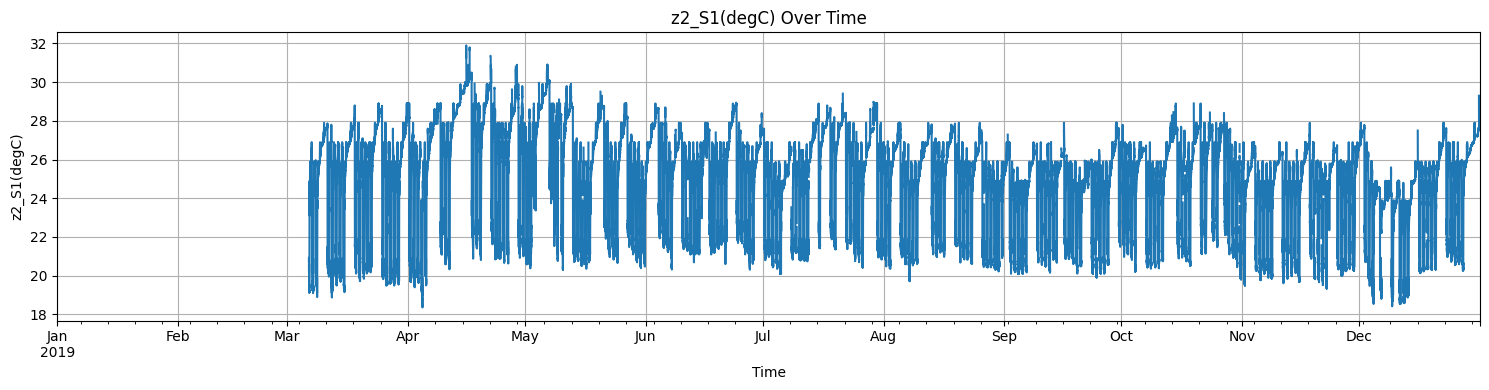

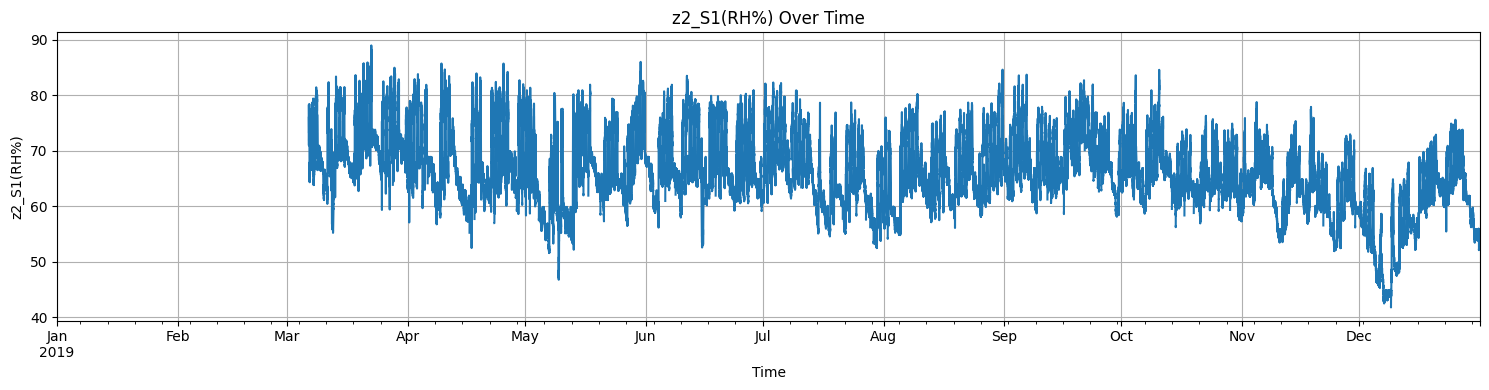

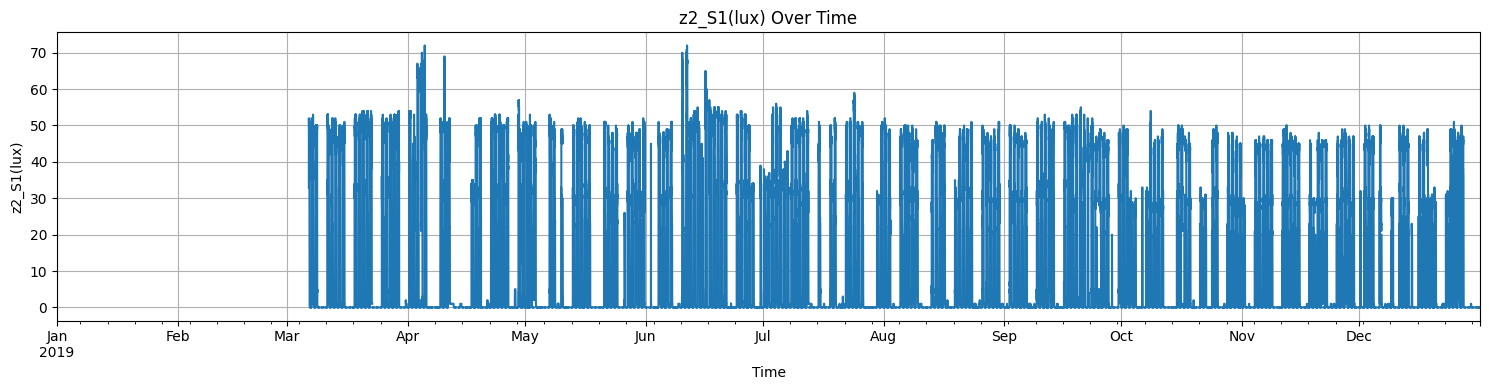

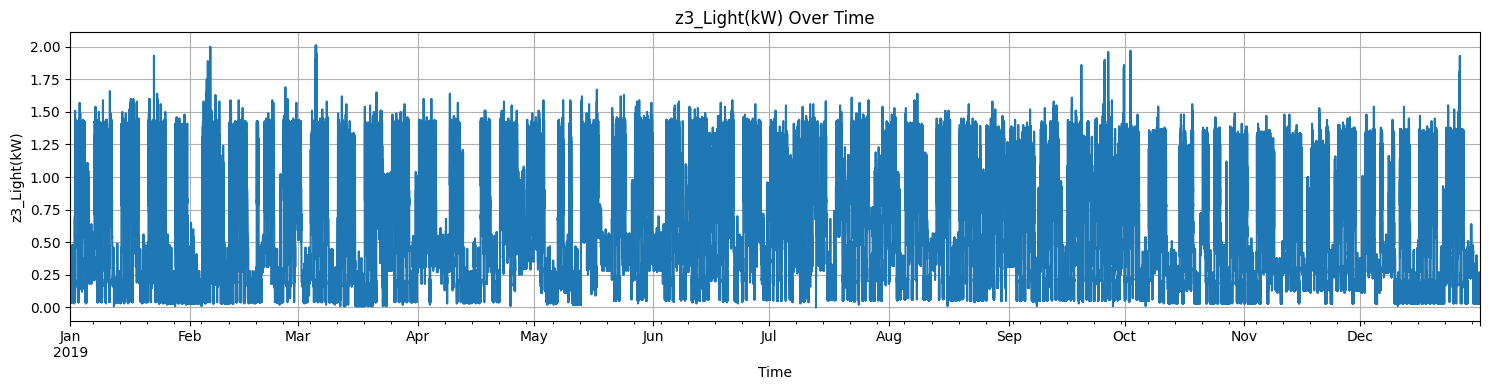

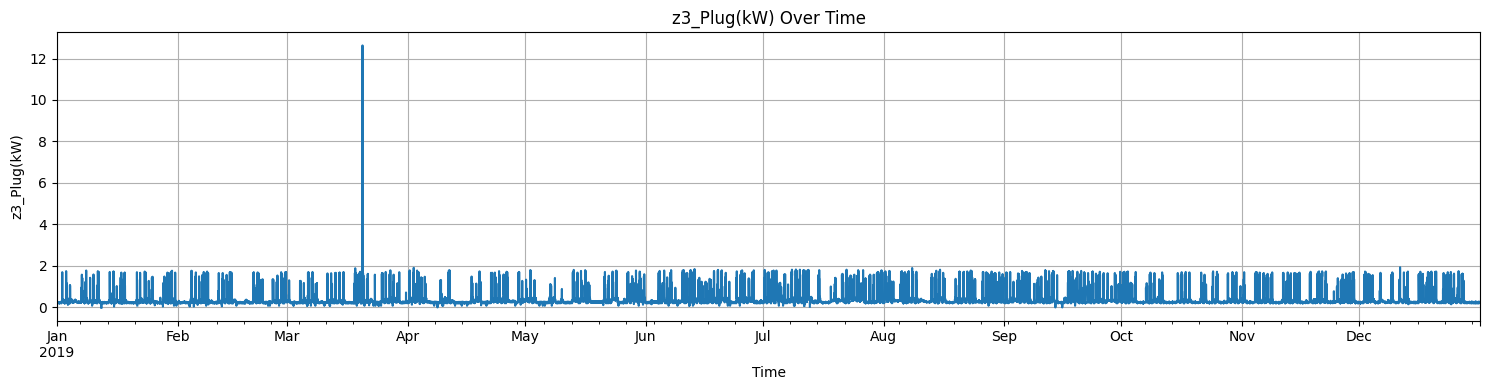

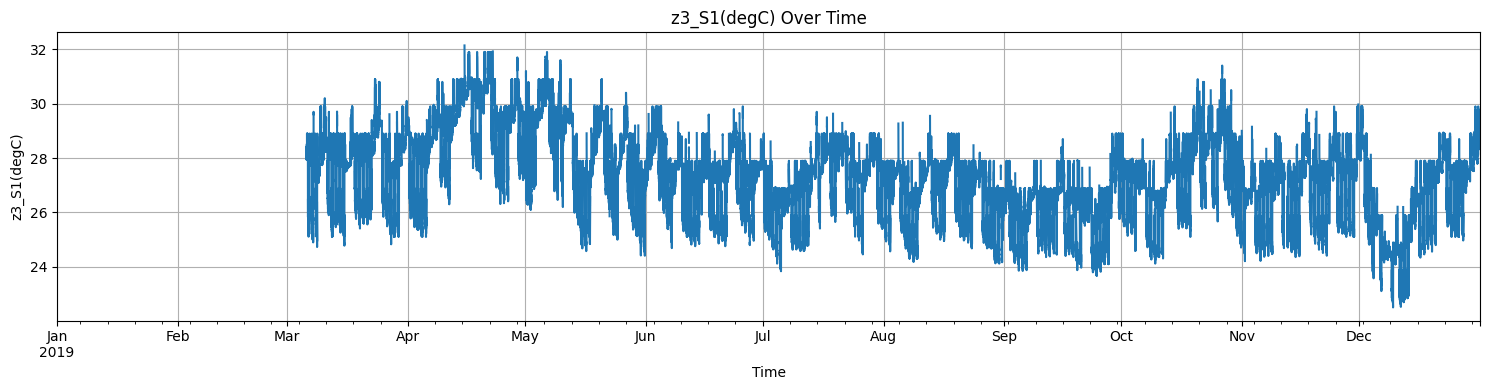

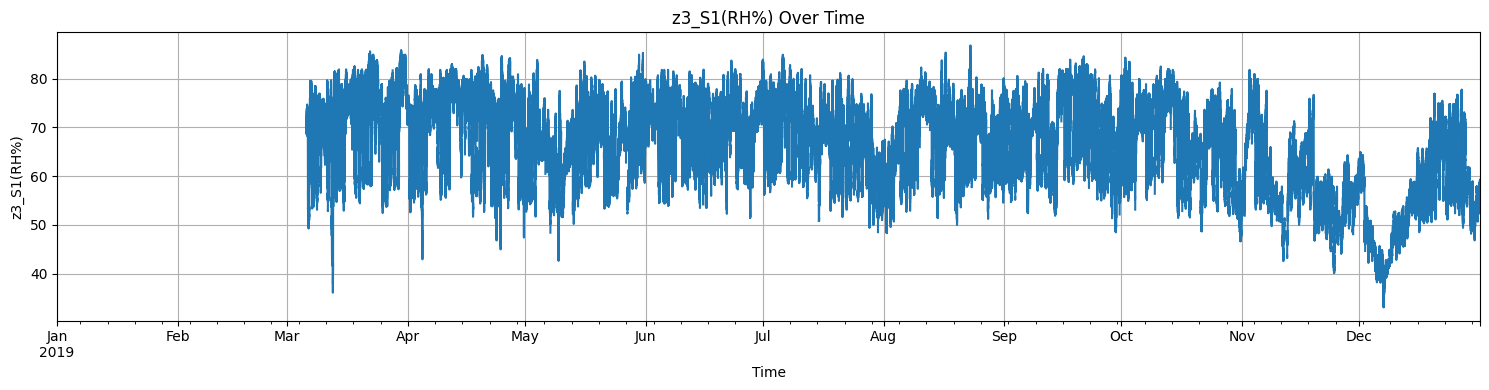

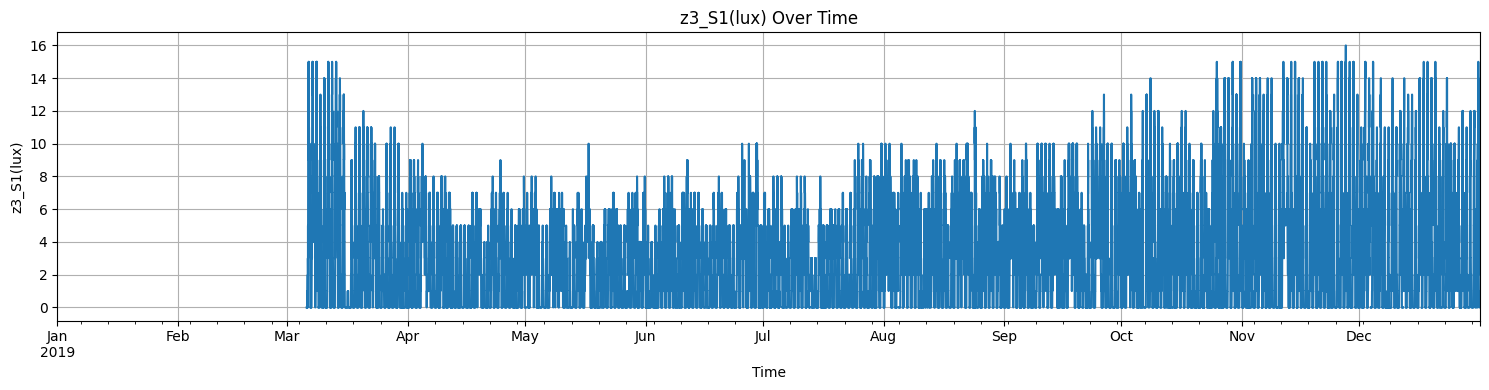

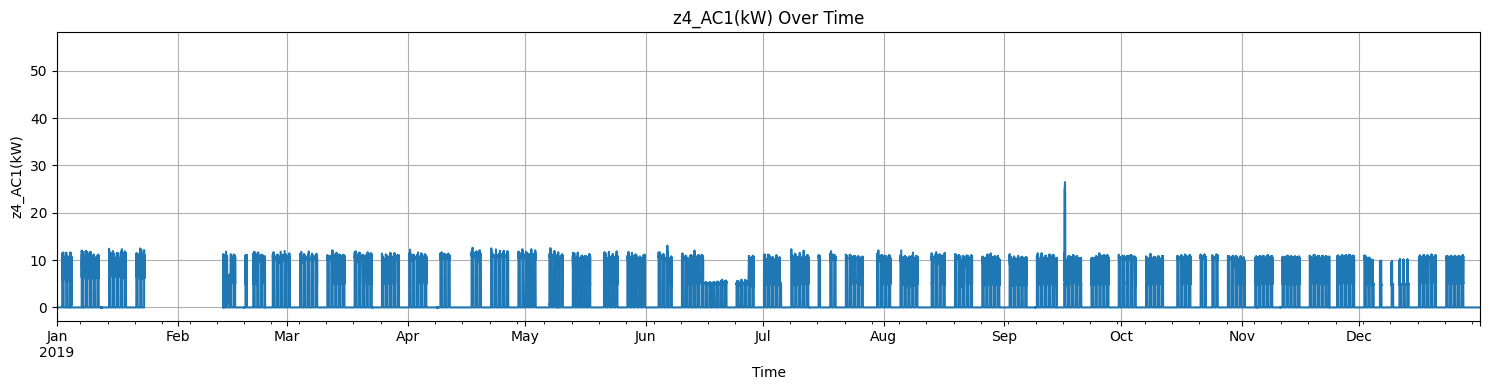

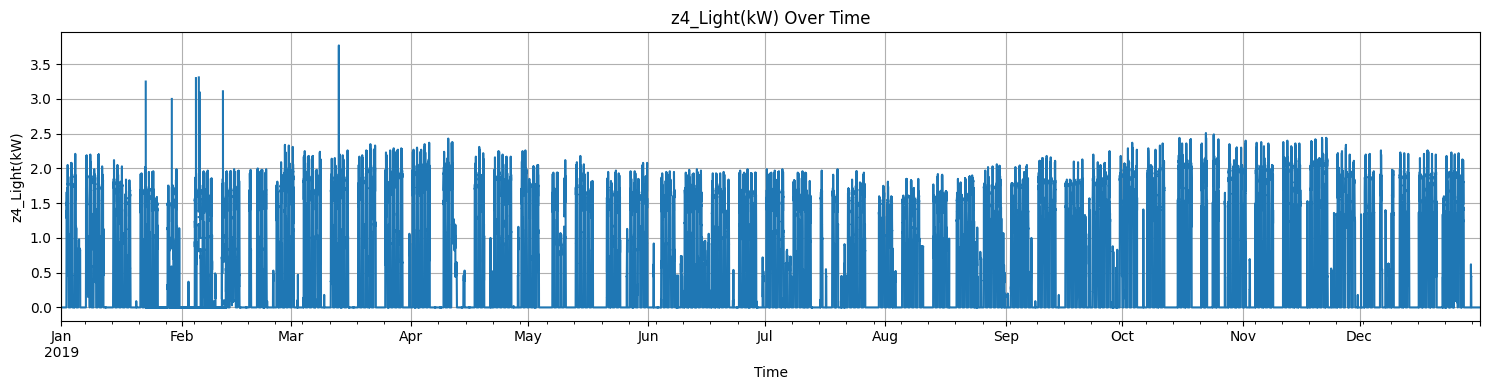

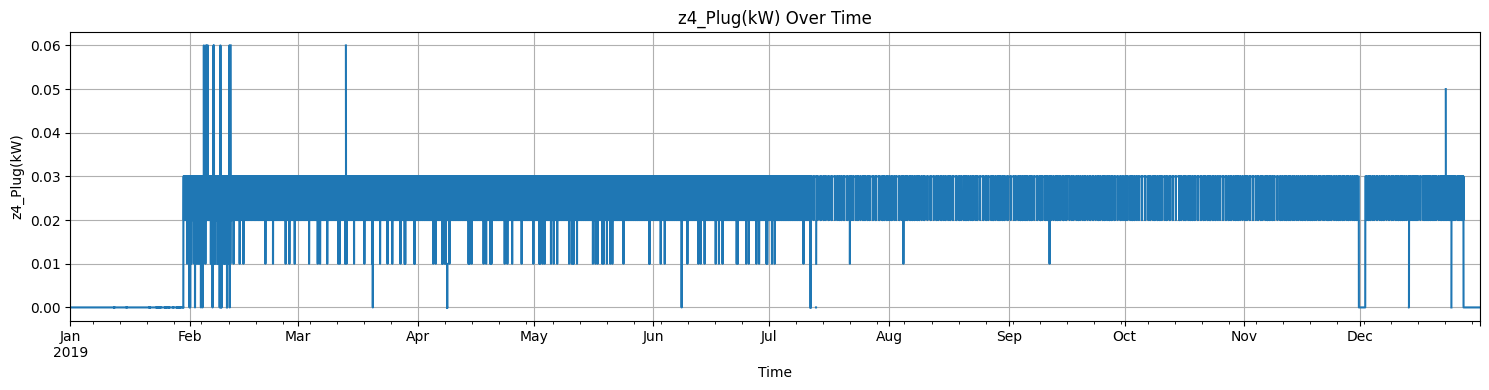

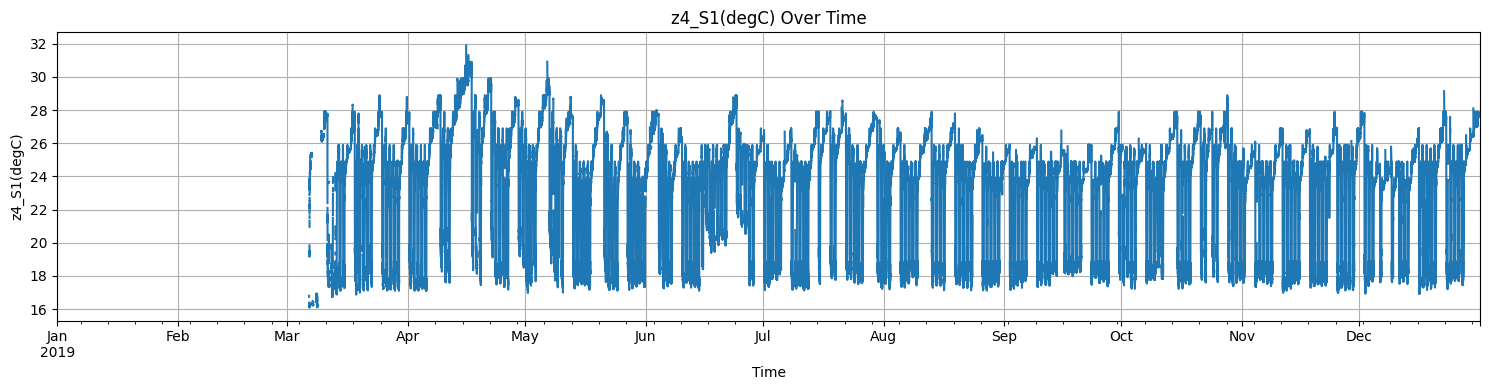

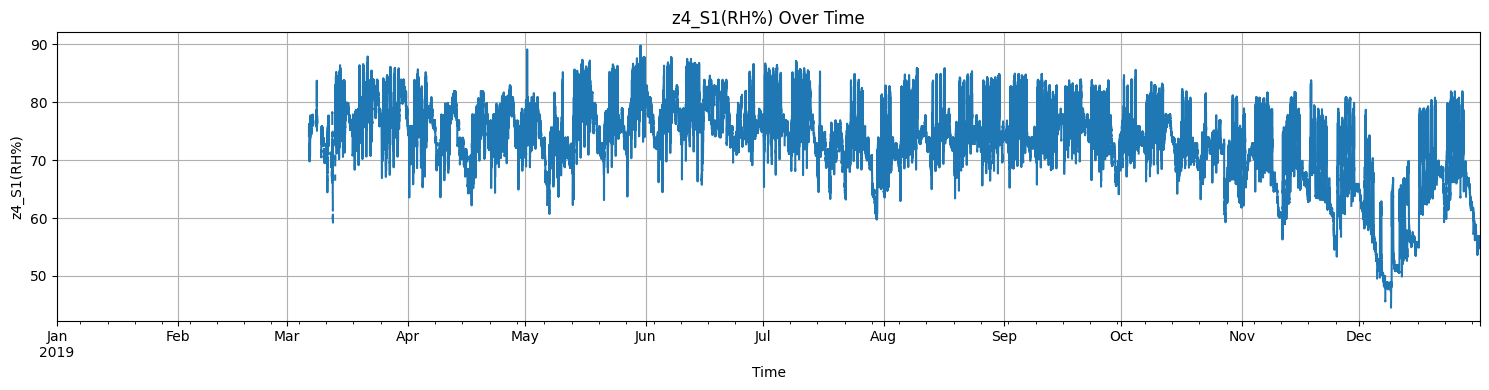

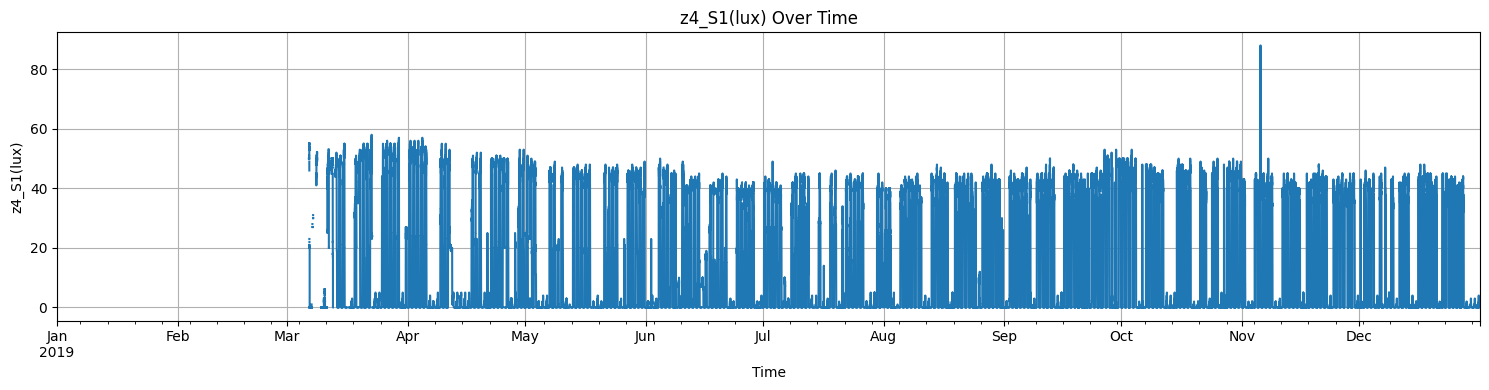

In [4]:
import matplotlib.pyplot as plt

# Loop through each column and plot if it's numeric
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(15, 4))
        df[column].plot(title=f"{column} Over Time")
        plt.ylabel(column)
        plt.xlabel("Time")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

cleaning

In [35]:
# Check percent missing
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))


z1_S1(degC)     21.234399
z1_S1(lux)      21.234399
z1_S1(RH%)      21.234399
z4_S1(lux)      19.651446
z4_S1(degC)     19.650875
z4_S1(RH%)      19.650495
z3_S1(lux)      19.485160
z3_S1(degC)     19.484589
z3_S1(RH%)      19.484399
z2_S1(degC)     18.459094
z2_S1(lux)      18.458904
z2_S1(RH%)      18.458524
z2_AC1(kW)       5.686834
z4_AC1(kW)       5.664384
z1_AC1(kW)       5.663623
z2_AC3(kW)       0.410769
z2_AC4(kW)       0.410769
z4_Light(kW)     0.410769
z2_AC2(kW)       0.410769
z4_Plug(kW)      0.148973
z2_Plug(kW)      0.148973
z2_Light(kW)     0.140030
z2_AC6(kW)       0.123858
z2_AC12(kW)      0.123858
z2_AC5(kW)       0.123858
z2_AC14(kW)      0.123858
z2_AC13(kW)      0.123858
z2_AC8(kW)       0.123858
z2_AC7(kW)       0.123858
z2_AC10(kW)      0.123858
z2_AC9(kW)       0.123858
z2_AC11(kW)      0.123858
z1_Plug(kW)      0.121005
z3_Light(kW)     0.120624
z1_Light(kW)     0.120434
z3_Plug(kW)      0.120434
Date             0.000000
dtype: float64


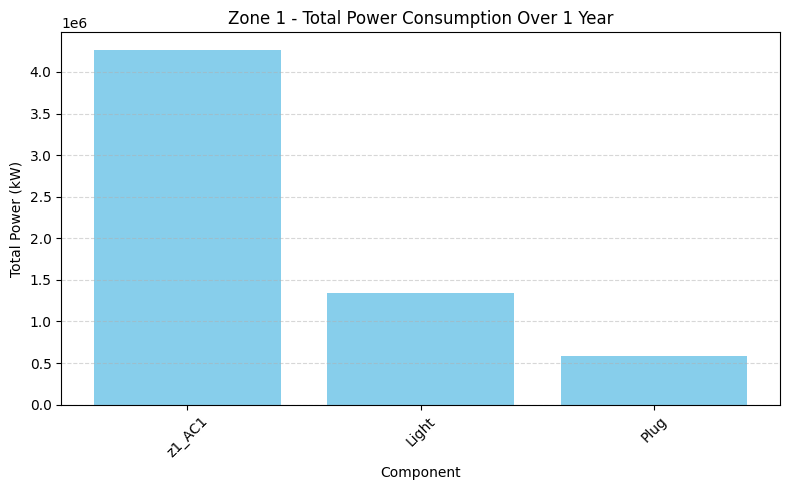

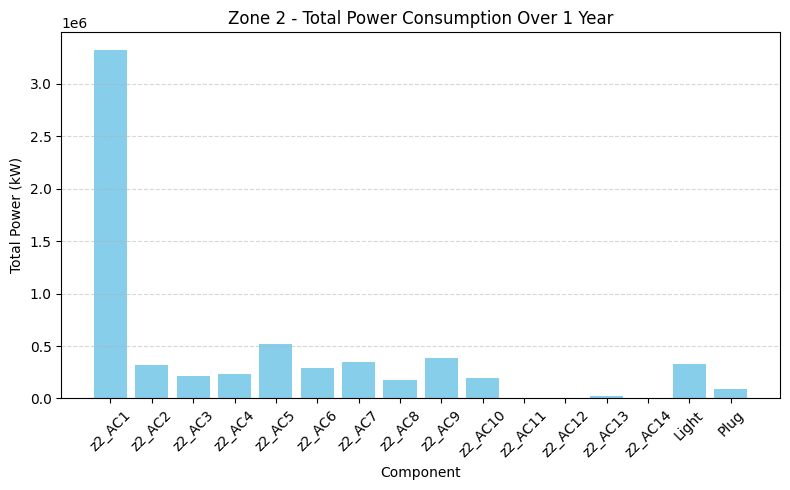

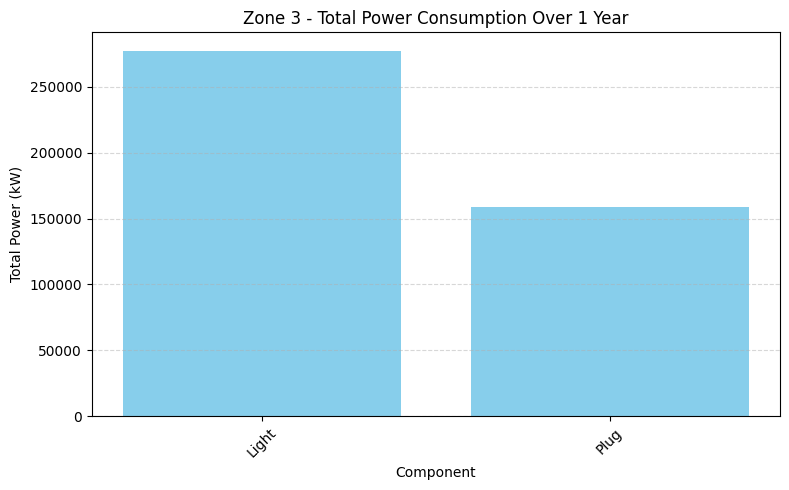

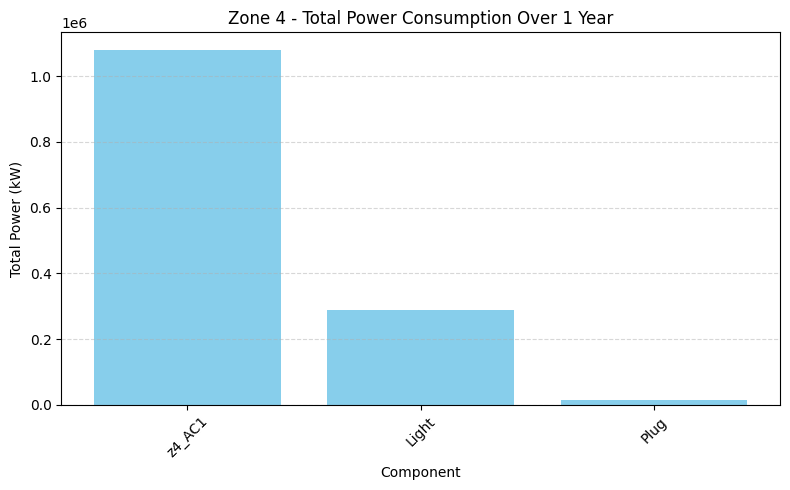

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Define columns
zone_columns = {
    'Zone 1': {
        'AC': ['z1_AC1(kW)'],
        'Light': ['z1_Light(kW)'],
        'Plug': ['z1_Plug(kW)']
    },
    'Zone 2': {
        'AC': [f'z2_AC{i}(kW)' for i in range(1, 15)],
        'Light': ['z2_Light(kW)'],
        'Plug': ['z2_Plug(kW)']
    },
    'Zone 3': {
        'AC': [],  # No AC
        'Light': ['z3_Light(kW)'],
        'Plug': ['z3_Plug(kW)']
    },
    'Zone 4': {
        'AC': ['z4_AC1(kW)'],
        'Light': ['z4_Light(kW)'],
        'Plug': ['z4_Plug(kW)']
    }
}

# Create graphs
for zone, groups in zone_columns.items():
    components = []
    values = []

    # ACs individually
    for ac_col in groups['AC']:
        components.append(ac_col.replace('(kW)', ''))
        values.append(df[ac_col].sum())

    # Light
    components.append('Light')
    values.append(df[groups['Light'][0]].sum())

    # Plug
    components.append('Plug')
    values.append(df[groups['Plug'][0]].sum())

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(components, values, color='skyblue')
    plt.title(f'{zone} - Total Power Consumption Over 1 Year')
    plt.ylabel('Total Power (kW)')
    plt.xlabel('Component')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



In [36]:
df = df[df.index > '2019-03-07']
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)



C:\Users\welcome\AppData\Local\Temp\ipykernel_1780\427770871.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\welcome\AppData\Local\Temp\ipykernel_1780\427770871.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [37]:
print(df.describe())

          z1_AC1(kW)   z1_Light(kW)    z1_Plug(kW)    z1_S1(degC)  \
count  431999.000000  431999.000000  431999.000000  431999.000000   
mean        8.784573       2.596938       1.145777      24.245727   
std        14.139156       3.439265       1.273554       2.794061   
min         0.000000       0.000000       0.000000      17.560000   
25%         0.000000       0.010000       0.260000      20.970000   
50%         0.000000       0.010000       0.380000      24.930000   
75%        20.220000       6.840000       2.310000      26.300000   
max        54.510000      22.380000       9.820000      31.900000   

          z1_S1(RH%)     z1_S1(lux)     z2_AC1(kW)     z2_AC2(kW)  \
count  431999.000000  431999.000000  431999.000000  431999.000000   
mean       62.861592      29.260459       6.761650       0.628648   
std         4.923772      35.763631      10.718267       0.530413   
min        45.500000       0.000000       0.000000       0.000000   
25%        59.600000       0.0000

In [38]:
# Check percent missing
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

Date            0.0
z1_AC1(kW)      0.0
z1_Light(kW)    0.0
z1_Plug(kW)     0.0
z1_S1(degC)     0.0
z1_S1(RH%)      0.0
z1_S1(lux)      0.0
z2_AC1(kW)      0.0
z2_AC2(kW)      0.0
z2_AC3(kW)      0.0
z2_AC4(kW)      0.0
z2_AC5(kW)      0.0
z2_AC6(kW)      0.0
z2_AC7(kW)      0.0
z2_AC8(kW)      0.0
z2_AC9(kW)      0.0
z2_AC10(kW)     0.0
z2_AC11(kW)     0.0
z2_AC12(kW)     0.0
z2_AC13(kW)     0.0
z2_AC14(kW)     0.0
z2_Light(kW)    0.0
z2_Plug(kW)     0.0
z2_S1(degC)     0.0
z2_S1(RH%)      0.0
z2_S1(lux)      0.0
z3_Light(kW)    0.0
z3_Plug(kW)     0.0
z3_S1(degC)     0.0
z3_S1(RH%)      0.0
z3_S1(lux)      0.0
z4_AC1(kW)      0.0
z4_Light(kW)    0.0
z4_Plug(kW)     0.0
z4_S1(degC)     0.0
z4_S1(RH%)      0.0
z4_S1(lux)      0.0
dtype: float64


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Add "Weekday" column (True if Monday-Friday)
daily_hourly_df['Weekday'] = daily_hourly_df.index.weekday < 5  # 0-4 are weekdays

# Step 2: Split into weekday and weekend datasets
weekday_data = daily_hourly_df[daily_hourly_df['Weekday'] == True].drop(columns=['Cluster', 'Weekday'])
weekend_data = daily_hourly_df[daily_hourly_df['Weekday'] == False].drop(columns=['Cluster', 'Weekday'])

# Step 3: Keep only numeric columns (remove datetime or other non-numeric)
weekday_data_clean = weekday_data.select_dtypes(include='number')
weekend_data_clean = weekend_data.select_dtypes(include='number')

# Step 4: Standardize (scale) the numeric data
scaler = StandardScaler()
weekday_scaled = scaler.fit_transform(weekday_data_clean)
weekend_scaled = scaler.fit_transform(weekend_data_clean)

# Optional: If you want to convert scaled data back to DataFrame for inspection
weekday_scaled_df = pd.DataFrame(weekday_scaled, index=weekday_data.index, columns=weekday_data_clean.columns)
weekend_scaled_df = pd.DataFrame(weekend_scaled, index=weekend_data.index, columns=weekend_data_clean.columns)

print("✅ Data scaled and ready for clustering or visualization.")


✅ Data scaled and ready for clustering or visualization.


In [41]:
kmeans_weekday = KMeans(n_clusters=3, random_state=42)
weekday_labels = kmeans_weekday.fit_predict(weekday_scaled)

kmeans_weekend = KMeans(n_clusters=2, random_state=42)
weekend_labels = kmeans_weekend.fit_predict(weekend_scaled)


In [42]:
weekday_data['WeekdayCluster'] = weekday_labels
weekend_data['WeekendCluster'] = weekend_labels


In [43]:
combined = pd.concat([weekday_data, weekend_data])


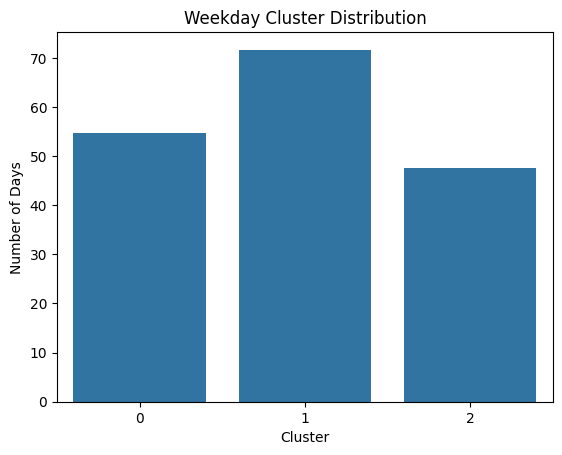

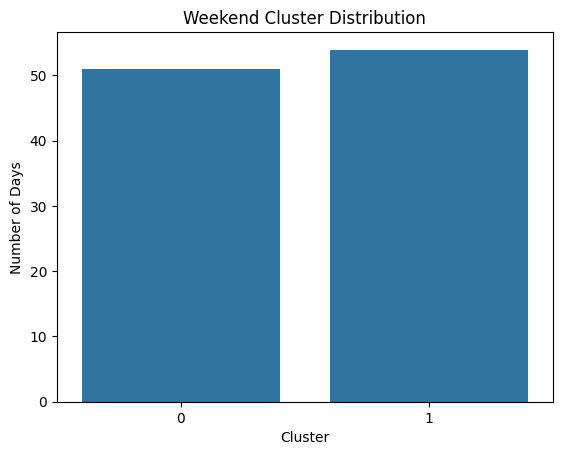

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot weekday cluster distribution
sns.countplot(x='WeekdayCluster', data=weekday_data)
plt.title("Weekday Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Days")
plt.show()

# Plot weekend cluster distribution
sns.countplot(x='WeekendCluster', data=weekend_data)
plt.title("Weekend Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Days")
plt.show()


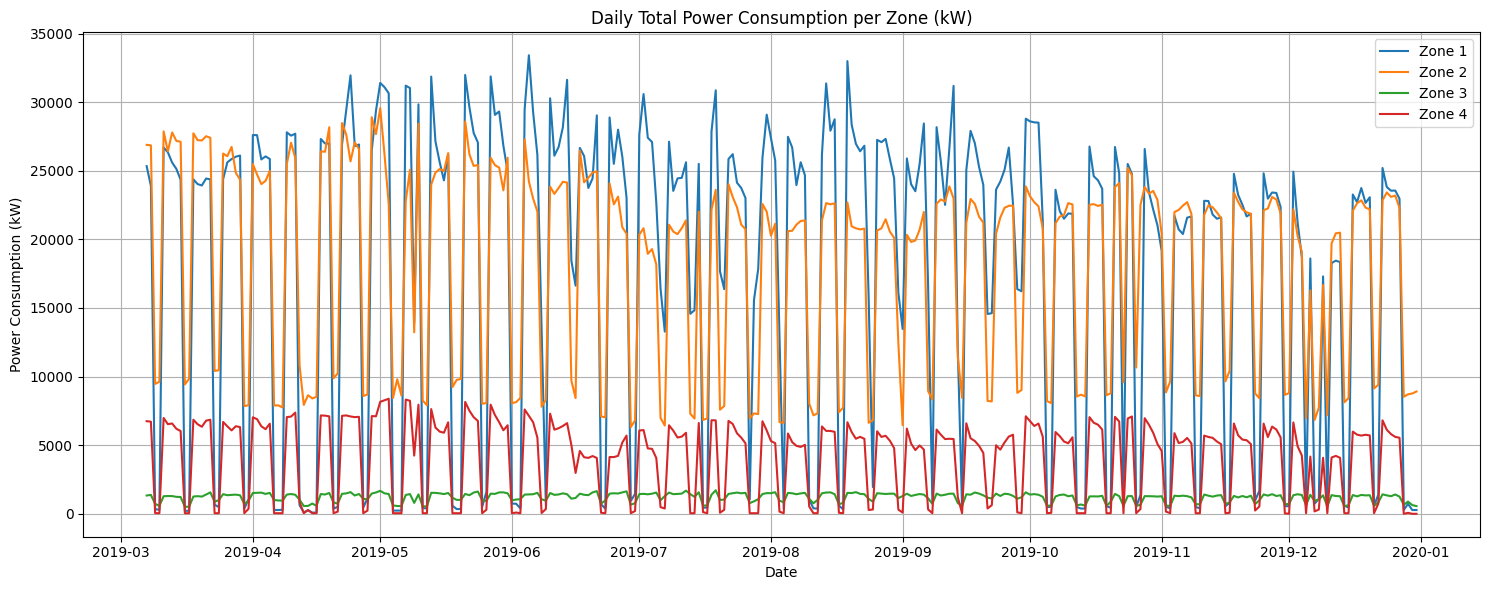

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned your dataframe as 'df'
# Ensure 'df' has a datetime index
df.index = pd.to_datetime(df.index)

# Resample to daily totals
df_daily = df.resample('D').sum()

# Calculate zone-wise daily total power
df_daily['Zone 1 Total (kW)'] = df_daily[['z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)']].sum(axis=1)
df_daily['Zone 2 Total (kW)'] = df_daily[[col for col in df_daily.columns if col.startswith('z2_AC') or col in ['z2_Light(kW)', 'z2_Plug(kW)']]].sum(axis=1)
df_daily['Zone 3 Total (kW)'] = df_daily[['z3_Light(kW)', 'z3_Plug(kW)']].sum(axis=1)  # No AC in Zone 3
df_daily['Zone 4 Total (kW)'] = df_daily[['z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)']].sum(axis=1)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['Zone 1 Total (kW)'], label='Zone 1')
plt.plot(df_daily.index, df_daily['Zone 2 Total (kW)'], label='Zone 2')
plt.plot(df_daily.index, df_daily['Zone 3 Total (kW)'], label='Zone 3')
plt.plot(df_daily.index, df_daily['Zone 4 Total (kW)'], label='Zone 4')
plt.title("Daily Total Power Consumption per Zone (kW)")
plt.xlabel("Date")
plt.ylabel("Power Consumption (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
df_model = df_hourly.copy()

# Ensure datetime index
df_model.index = pd.to_datetime(df_model.index)

# Time-based features
df_model['hour'] = df_model.index.hour
df_model['dayofweek'] = df_model.index.dayofweek
df_model['month'] = df_model.index.month
df_model['is_weekend'] = df_model['dayofweek'] >= 5

# Target variable: AC consumption next hour
df_model['target'] = df_model['z1_AC1(kW)'].shift(-1)

# Drop NaN target rows
df_model.dropna(subset=['target'], inplace=True)


In [67]:
features = [
     'hour', 'dayofweek', 'month', 'is_weekend',
    'z1_S1(degC)', 'z1_S1(RH%)', 'z1_S1(lux)'
]

X = df_model[features]
y = df_model['target']


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Predictions
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}, R²: {r2:.3f}")


RMSE: 231.336, R²: 0.886


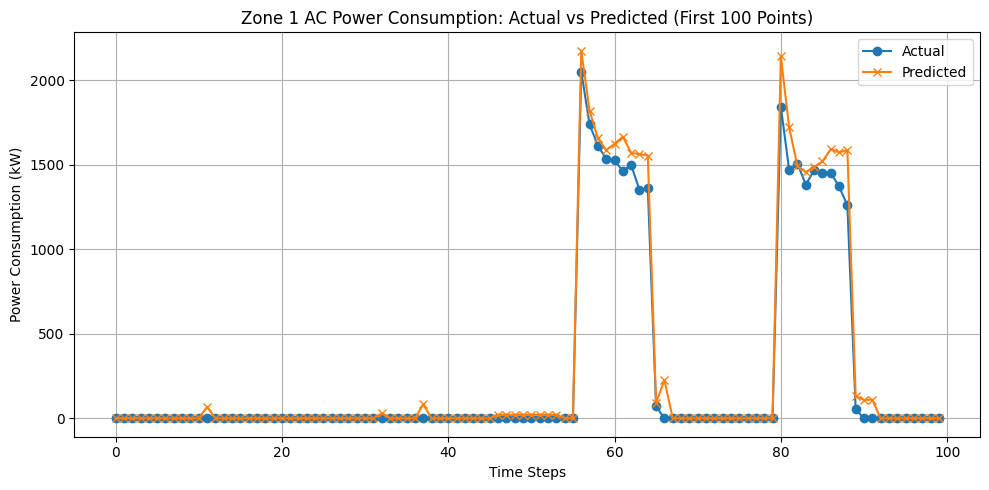

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Zone 1 AC Power Consumption: Actual vs Predicted (First 100 Points)')
plt.xlabel('Time Steps')
plt.ylabel('Power Consumption (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Evaluation:")
print(f"RMSE: {rmse:.3f} kW")
print(f"MAE: {mae:.3f} kW")
print(f"R² Score: {r2:.3f}")


✅ Model Evaluation:
RMSE: 231.336 kW
MAE: 109.175 kW
R² Score: 0.886


In [72]:
sensor_input = {
    'hour': now.hour,
    'dayofweek': now.weekday(),
    'month': now.month,
    'is_weekend': int(now.weekday() >= 5),
    'z1_S1(degC)': 25.4,
    'z1_S1(RH%)': 60.2,
    'z1_S1(lux)': 150.0,
}
example_data = pd.DataFrame([sensor_input], columns=features)

# Scale and predict
example_scaled = scaler.transform(example_data)
prediction = model.predict(example_scaled)[0]
print(f"Predicted Zone 1 AC consumption (next hour): {prediction:.3f} kW")

Predicted Zone 1 AC consumption (next hour): 662.341 kW
